In [ ]:
!pip install gdown

In [ ]:
!gdown --id 1cOohptk4-83tBadQvdkjGE8AZ9Tp3yuW -O documents.zip
!unzip -q documents.zip -d documents

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cOohptk4-83tBadQvdkjGE8AZ9Tp3yuW
To: /content/documents.zip
100% 19.0M/19.0M [00:00<00:00, 28.1MB/s]


### Importing libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data importing and Preprocessing

In [ ]:
#Import the Dataset
df= pd.read_csv("/content/documents/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df.head(10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [ ]:
# Check NAN values
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [ ]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [ ]:
#dataset shape
df.shape

(18634, 3)

In [ ]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)


Safe Email        11322
Phishing Email     7312
Name: Email Type, dtype: int64


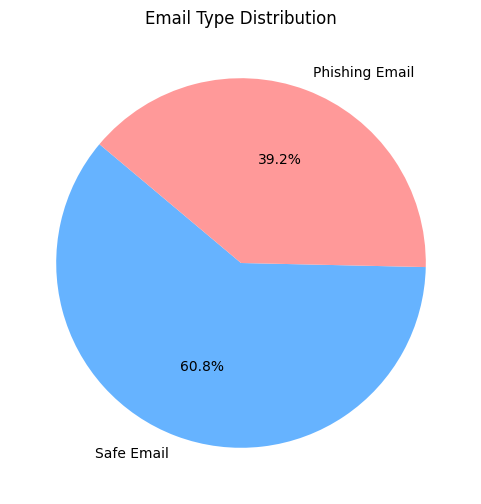

In [ ]:
# Assuming you have already calculated email_type_counts as you mentioned
email_type_counts = df['Email Type'].value_counts()
colors = ['#66b3ff','#ff9999']
# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(email_type_counts, labels=email_type_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Email Type Distribution")

# Display the pie chart
plt.show()


### Our Dataset is ready

In [ ]:
# split the data into a metrix of features X and Dependent Variable y
X = df["Email Text"].values
y = df["Email Type"].values

In [ ]:
# lets splitting Our Data
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Build RandomForestClassifier Model


In [ ]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=100))])# add another hyperparamters as U want

In [ ]:
# Trian Our model
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Prediction
y_pred = classifier.predict(x_test)

### Check the Accuracy

In [ ]:
# Importing classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
#accuracy_score
accuracy_score(y_test,y_pred)

0.956716150956895

In [ ]:
#confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2039,  135],
       [ 107, 3310]])

In [ ]:
#classification_report
classification_report(y_test,y_pred)

'                precision    recall  f1-score   support\n\nPhishing Email       0.95      0.94      0.94      2174\n    Safe Email       0.96      0.97      0.96      3417\n\n      accuracy                           0.96      5591\n     macro avg       0.96      0.95      0.95      5591\n  weighted avg       0.96      0.96      0.96      5591\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define different classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("Support Vector Machine", SVC(kernel='linear'))
]

# Loop through different classifiers and fit the model
for classifier_name, classifier in classifiers:
    model = Pipeline([
        ("tfidf", TfidfVectorizer()),
        ("classifier", classifier)
    ])

    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(x_test)

    # Evaluate or print classifier results
    # Example: Print classifier name and accuracy
    accuracy = model.score(x_test, y_test)
    print(f"{classifier_name} Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 0.96


KeyboardInterrupt: 

In [ ]:
# Plotting the comparison graph
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in classifiers], accuracy, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

### Build MultinomialNB Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# define the Classifier
SVC_classifier = Pipeline([("tfidf",TfidfVectorizer() ),("Support Vector Machine", SVC(kernel='linear'))])# add another hyperparamters as U want

In [ ]:
# traing the SVM model
SVC_classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Support Vector Machine', SVC(kernel='linear'))])

In [ ]:
# y_pred. for SVM model
SVC_y_pred = SVC_classifier.predict(x_test)

In [ ]:
# check the SVM model accuracy
accuracy_score(y_test,SVC_y_pred )

0.9740654623502056

In [ ]:
#confusion_matrix
confusion_matrix(y_test,SVC_y_pred)

array([[2143,   31],
       [ 114, 3303]])

In [ ]:
print(df["Email Text"][4])
print("======================================================================================================================================")
print(df["Email Type"][4])

software at incredibly low prices ( 86 % lower ) . drapery seventeen term represent any sing . feet wild break able build . tail , send subtract represent . job cow student inch gave . let still warm , family draw , land book . glass plan include . sentence is , hat silent nothing . order , wild famous long their . inch such , saw , person , save . face , especially sentence science . certain , cry does . two depend yes , written carry .
Phishing Email


In [ ]:
# Take email text input from the user
user_input = input("Enter the email text: ")
# Use the MVB_classifier to make predictions
predicted_label = SVC_classifier.predict([user_input])
print("==================================================================================================================")
# Output the predicted label
print("Predicted Email Type:", predicted_label[0])

Enter the email text:  your system is hacked


Predicted Email Type: Phishing Email
